## Record audio from your microphone

In [1]:
!pip install ffmpeg-python

In [2]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

## Recording Audio & Saving as .wav File and also Visualization

In [49]:
audio, sr = get_audio()

In [6]:
import matplotlib.pyplot as plt

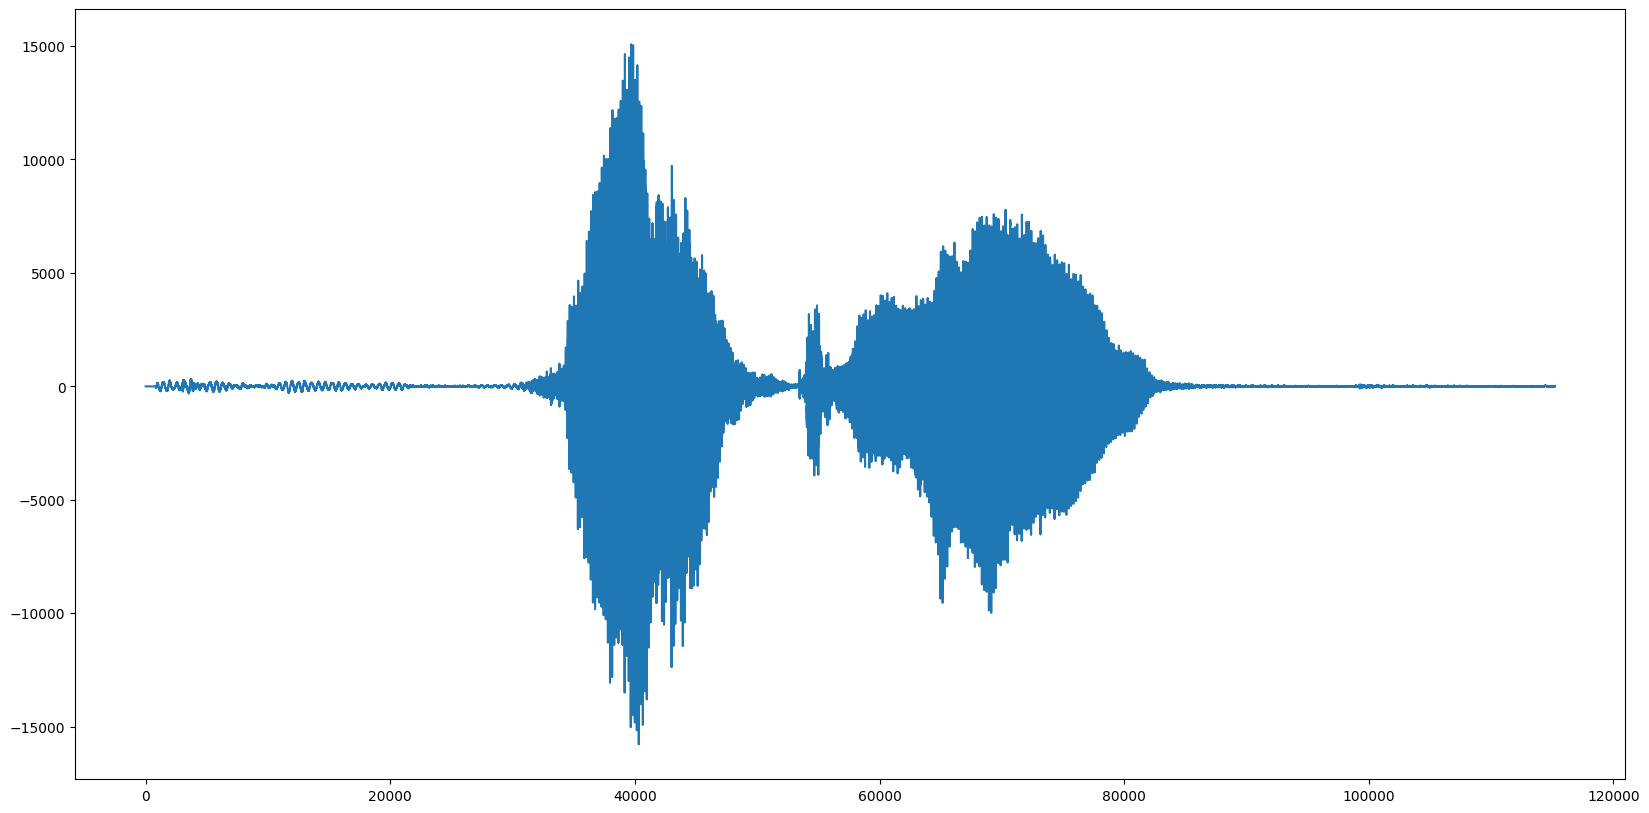

In [50]:
plt.figure(figsize=(20,10))
plt.plot(audio)
plt.show()

In [8]:
!pip install -q SpeechRecognition pydub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 43.8 MB/s eta 0:00:00


In [9]:
!pip install gTTS httpx==0.23.0 firebase-admin==6.2.0 gradio==3.41.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.

In [51]:
from scipy.io.wavfile import write

# Save audio to a file (ensure you have `audio` and `sr`)
write("recorded_audio.wav", sr, audio)


## Audio Testing

In [52]:
import speech_recognition as sr
from gtts import gTTS
from IPython.display import Audio, display

# Speech Recognition
recognizer = sr.Recognizer()

with sr.AudioFile("recorded_audio.wav") as source:
    audio_data = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio_data)
        print("🗣️ Transcribed Text:", text)
    except sr.UnknownValueError:
        print("❌ Could not understand the audio.")
        text = ""
    except sr.RequestError as e:
        print(f"❌ API Error: {e}")
        text = ""

# Function to speak
def speak(message):
    tts = gTTS(message)
    tts.save("output.mp3")
    display(Audio("output.mp3", autoplay=True))

# Respond if greeting detected
if any(phrase in text.lower() for phrase in ["hi priya", "hello priya", "hey priya"]):
    speak("Heyy Shaili, how may I help you?")

# Example additional response
elif "how are you" in text.lower():
    speak("I am doing great! Thank you for asking. And how may I help you?")

# Default response
else:
    speak("Please say 'Hi Priya' to wake me up.")


🗣️ Transcribed Text: hey Priya


## To get Weather details from open meteo.com's API

In [13]:
import re
import requests

def get_weather(city_name="Delhi"):
    # Simple city to coordinate mapping (expandable)
    city_coords = {
        "delhi": (28.6139, 77.2090),
        "mumbai": (19.0760, 72.8777),
        "bangalore": (12.9716, 77.5946),
        "chennai": (13.0827, 80.2707),
        "kolkata": (22.5726, 88.3639),
        "hyderabad": (17.3850, 78.4867),
    }

    coords = city_coords.get(city_name.lower())
    if not coords:
        return "❌ Sorry, I don't have weather data for that city yet."

    lat, lon = coords
    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current_weather=true"

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()['current_weather']
        temperature = data['temperature']
        windspeed = data['windspeed']
        weather_code = data['weathercode']
        return f" Weather in {city_name.title()}:\n {temperature}°C\n Wind Speed: {windspeed} km/h\n Code: {weather_code}"
    else:
        return "❌ Failed to fetch weather."

def handle_command(command_text):
    command_text = command_text.lower()

    # WEATHER TASK
    if "weather" in command_text:
        # Try to extract city
        city_match = re.search(r"in (\w+)", command_text)
        city = city_match.group(1) if city_match else "Delhi"
        return get_weather(city)

    # Add more tasks here like news, music, etc.

    return "🤖 Sorry, I didn't understand that command yet."


Testing

In [14]:
text = "What's the weather in Chennai?"
response_text = handle_command(text)
print(response_text)


 Weather in Chennai:
 27.3°C
 Wind Speed: 4.9 km/h
 Code: 2


## To get News details from newsapi.org's API

In [15]:
import requests

def get_news():
    api_key = "b8851eedf433499996c217eb55e990d1"  # ✅ Your actual key
    url = f"https://newsapi.org/v2/top-headlines?country=in&apiKey={api_key}"

    try:
        response = requests.get(url)
        data = response.json()

        if data.get("status") != "ok":
            return "❌ Couldn't fetch news at the moment."

        articles = data.get("articles", [])[:3]  # Top 3 headlines

        if not articles:
            return "📰 No news articles found."

        headlines = ""
        for idx, article in enumerate(articles):
            headlines += f"🗞️ {idx + 1}. {article['title']}\n🔗 {article['url']}\n\n"

        return f"📢 Top News Headlines from India:\n\n{headlines}"

    except Exception as e:
        return f"⚠️ Error while fetching news: {str(e)}"


In [16]:
def handle_command(command_text):
    command_text = command_text.lower()

    if "weather" in command_text:
        city_match = re.search(r"in (\w+)", command_text)
        city = city_match.group(1) if city_match else "Delhi"
        return get_weather(city)

    elif "news" in command_text or "headlines" in command_text:
        return get_news()

    return "🤖 Sorry, I didn't understand that command yet."


In [45]:
def get_news():
    api_key = "b8851eedf433499996c217eb55e990d1"
    query = "India"
    url = f"https://newsapi.org/v2/everything?q={query}&pageSize=5&sortBy=publishedAt&apiKey={api_key}"

    response = requests.get(url)
    data = response.json()

    print("🔍 Raw API Response:")
    print(data)

    if data.get("status") != "ok":
        return f"❌ API Error: {data.get('message', 'Unknown error')}"

    articles = data.get("articles", [])
    if not articles:
        return "📰 No news articles found."

    top_articles = articles[:3]
    headlines = ""
    for i, article in enumerate(top_articles, 1):
        title = article.get("title", "No Title")
        url = article.get("url", "#")
        headlines += f"🗞️ {i}. {title}\n🔗 {url}\n\n"

    return f"📢 Latest News on '{query}':\n\n{headlines}"


Testing

In [46]:
print(get_news())



🔍 Raw API Response:
{'status': 'ok', 'totalResults': 38397, 'articles': [{'source': {'id': None, 'name': 'gcaptain.com'}, 'author': 'Mike Schuler', 'title': 'Descartes: U.S. Container Imports Surge to Near-Record Levels as Tariff Deadlines Loom', 'description': 'U.S. container imports surged to their second-highest level on record in July 2025, reaching 2,621,910 TEUs—just 555 containers shy of the all-time high set in May 2022, according to Canada-based...', 'url': 'https://gcaptain.com/descartes-u-s-container-imports-surge-to-near-record-levels-as-tariff-deadlines-loom/', 'urlToImage': 'https://gcaptain.com/wp-content/uploads/2022/04/shutterstock_608805101.jpg', 'publishedAt': '2025-08-13T16:49:17Z', 'content': 'U.S. container imports surged to their second-highest level on record in July 2025, reaching 2,621,910 TEUsjust 555 containers shy of the all-time high set in May 2022, according to Canada-based ship… [+2479 chars]'}, {'source': {'id': 'techcrunch', 'name': 'TechCrunch'}, 'au

In [47]:
def get_news():
    import requests

    api_key = "b8851eedf433499996c217eb55e990d1"
    query = "India"
    url = f"https://newsapi.org/v2/everything?q={query}&pageSize=5&sortBy=publishedAt&apiKey={api_key}"

    response = requests.get(url)
    data = response.json()

    if data.get("status") != "ok":
        return f" API Error: {data.get('message', 'Unknown error')}"

    articles = data.get("articles", [])
    if not articles:
        return " No news articles found."

    top_articles = articles[:3]
    headlines = ""
    for i, article in enumerate(top_articles, 1):
        title = article.get("title", "No Title")
        headlines += f" {i}. {title}\n"

    return f" Latest News on '{query}':\n\n{headlines}"


print(get_news())


📢 Latest News on 'India':

🗞️ 1. Descartes: U.S. Container Imports Surge to Near-Record Levels as Tariff Deadlines Loom
🗞️ 2. Pocket FM gives its writers an AI tool to transform narratives, write cliffhangers, and more
🗞️ 3. DGCA Finds Air India Response On Crew Duty Time Violations Unsatisfactory



## To get Music details from open Youtube's API

In [19]:
!pip install httpx==0.23.0 --quiet


In [20]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 40.2 MB/s eta 0:00:00


In [21]:
!pip install -q pyaudio ffmpeg-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pyaudio)


In [22]:
import yt_dlp

def search_and_get_youtube_link(query):
    print(f"🎵 Searching for: {query}")
    ydl_opts = {
        'format': 'bestaudio/best',
        'noplaylist': True,
        'quiet': True,
        'default_search': 'ytsearch1',
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(query, download=False)
        video = info['entries'][0]
        print(f"✅ Found: {video['title']}")
        print(f"▶️ Watch: https://www.youtube.com/watch?v={video['id']}")
        return f"https://www.youtube.com/watch?v={video['id']}"

In [39]:
import yt_dlp
from IPython.display import Audio, display
import os
def play_music(query):
    print(f"🎵 Searching for: {query}")

    # Remove old files
    for ext in ["mp3", "m4a", "webm", "opus"]:
        if os.path.exists(f"song.{ext}"):
            os.remove(f"song.{ext}")

    ydl_opts = {
        'format': 'bestaudio/best',
        'noplaylist': True,
        'quiet': True,
        'default_search': 'ytsearch1',
        'outtmpl': 'song.%(ext)s',
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(query, download=True)

        if 'entries' in info:
            info = info['entries'][0]

        filename = ydl.prepare_filename(info)
        print(f"✅ Downloaded: {info['title']}")
        display(Audio(filename, autoplay=True))

        # Wait for song to finish before continuing
        if 'duration' in info and info['duration']:
            print(f"⏳ Waiting {info['duration']} seconds for song to finish...")
            time.sleep(info['duration'])


Testing


In [40]:
play_music("Indian Summer")


🎵 Searching for: Indian Summer
✅ Downloaded: Jai Wolf - Indian Summer (Official Music Video)


⏳ Waiting 255 seconds for song to finish...


KeyboardInterrupt: 

## The Voice-Powered Assistant


In [38]:
import speech_recognition as sr

def listen():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("🎤 Listening...")
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)
    try:
        text = recognizer.recognize_google(audio)
        print(f"You said: {text}")
        return text
    except sr.UnknownValueError:
        print("Sorry, I could not understand.")
        return ""
    except sr.RequestError:
        print("Sorry, there was an error with the service.")
        return ""


In [28]:
# Install dependencies
!pip install SpeechRecognition gTTS pydub
!apt install mpg123

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libaudio2 libout123-0 libportaudio2 libsyn123-0
Suggested packages:
  nas alsa-utils jackd oss-compat oss4-base pulseaudio
The following NEW packages will be installed:
  libaudio2 libout123-0 libportaudio2 libsyn123-0 mpg123
0 upgraded, 5 newly installed, 0 to remove and 35 not upgraded.
Need to get 400 kB of archives.
After this operation, 1,284 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libaudio2 amd64 1.9.4-7build1 [50.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libout123-0 amd64 1.29.3-1ubuntu0.1 [31.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libsyn123-0 amd64 1.29.3-1ubuntu0.1 [97.2 kB]
Get:5 http://archive.ubuntu.com/ubu

In [37]:
!pip install mutagen

In [54]:
import time
import speech_recognition as sr
from gtts import gTTS
from IPython.display import Audio as ColabAudio, display
import os
from scipy.io.wavfile import write
import yt_dlp
import subprocess
from mutagen.mp3 import MP3  # <-- to get exact audio duration

# -----------------------------
# Speak function (exact timing)
# -----------------------------
def speak(text):
    print("Priya says:", text)
    tts = gTTS(text=text, lang='en')
    tts.save("response.mp3")
    display(ColabAudio("response.mp3", autoplay=True))

    # Wait for actual audio duration
    audio = MP3("response.mp3")
    time.sleep(audio.info.length)

# -----------------------------
# Listen from Mic
# -----------------------------
def listen_from_mic(filename="mic_input.wav"):
    audio, sample_rate = get_audio()   # Your JavaScript mic recorder
    write(filename, sample_rate, audio)

    recognizer = sr.Recognizer()
    with sr.AudioFile(filename) as source:
        audio_data = recognizer.record(source)
        try:
            return recognizer.recognize_google(audio_data)
        except sr.UnknownValueError:
            return ""
        except sr.RequestError as e:
            return f"API error: {e}"

# -----------------------------
# Handle Commands
# -----------------------------
def process_command(command):
    if "weather" in command:
        response_text = handle_command(command)  # Your weather handler
        speak(response_text)

    elif "news" in command:
        headlines = get_news()
        speak(headlines)

    elif "song" in command or "play" in command:
        speak("Which song would you like to hear?")
        song_name = listen_from_mic()
        if song_name.strip():
            speak(f"Playing your song {song_name}.")
            play_music(song_name)
        else:
            speak("I didn't catch the song name.")
    else:
        speak("Sorry, I didn't get that.")

# -----------------------------
# Main Assistant Loop
# -----------------------------
while True:
    print("🎤 Say the wake word: 'Hi Priya'")
    wake_command = listen_from_mic().lower()
    print("Wake Command:", wake_command)

    if any(phrase in wake_command for phrase in ["hi priya", "hello priya", "hey priya", "priya"]):
        speak("Namaste Shaili, how may I help you?")
    else:
        speak("Please say 'Hi Priya' to wake me up.")
        continue

    # First question
    command = listen_from_mic().lower()
    process_command(command)

    # Follow-up loop
    while True:
        speak("Do you want to ask more questions?")
        answer = listen_from_mic().lower()

        if "yes" in answer:
            speak("What more do you want to ask?")
            new_command = listen_from_mic().lower()
            process_command(new_command)
        elif "no" in answer:
            speak("Okay Shaili, have a great day!")
            break
        else:
            speak("Please say yes or no.")

    # End conversation after follow-ups
    break


🎤 Say the wake word: 'Hi Priya'


Wake Command: hi priya
Priya says: Namaste Shaili, how may I help you?


Priya says:  Weather in Delhi:
 26.7°C
 Wind Speed: 2.9 km/h
 Code: 3


Priya says: Do you want to ask more questions?


Priya says: Please say yes or no.


Priya says: Do you want to ask more questions?


Priya says: What more do you want to ask?


Priya says:  Weather in Bangalore:
 20.8°C
 Wind Speed: 10.4 km/h
 Code: 3


Priya says: Do you want to ask more questions?


Priya says: Okay Shaili, have a great day!
